# Traditional Model

In [1]:
import os
os.chdir('../../')

In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn
from math import radians, sin, cos, sqrt, asin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
from data_pipeline import Pipeline

In [4]:
df = pd.read_csv('data/CreditCardFraudFourYears.csv')

In [5]:
pipeline = Pipeline()
transformed_df = pipeline.transform(df)

In [16]:
for column in transformed_df.columns:
    if pd.api.types.is_bool_dtype(transformed_df[column]):
        transformed_df[column] = transformed_df[column].astype(int)
    if pd.api.types.is_integer_dtype(transformed_df[column]):
        transformed_df[column] = transformed_df[column].astype(float)
transformed_df.dtypes


total_daily_transactions          float64
total_daily_fraud_transactions    float64
hour_0                            float64
hour_1                            float64
hour_2                            float64
hour_3                            float64
hour_4                            float64
hour_5                            float64
hour_6                            float64
hour_7                            float64
hour_8                            float64
hour_9                            float64
hour_10                           float64
hour_11                           float64
hour_12                           float64
hour_13                           float64
hour_14                           float64
hour_15                           float64
hour_16                           float64
hour_17                           float64
hour_18                           float64
hour_19                           float64
hour_20                           float64
hour_21                           

In [17]:
split_idx = int(len(transformed_df) * 0.8)

split_date = transformed_df.index[split_idx]
print(split_date)

2021-12-31 00:00:00


In [18]:
from sklearn.model_selection import train_test_split

train = transformed_df.loc[transformed_df.index <= split_date]
test = transformed_df.loc[transformed_df.index > split_date]

train_info = (train.index.min(), train.index.max(), len(train))
test_info = (test.index.min(), test.index.max(), len(test))

print(train_info, test_info)

print(f'Training set range: {train.index.min()} to {train.index.max()}')
print(f'Test set range: {test.index.min()} to {test.index.max()}')
print(f'Training set size: {len(train)}')
print(f'Test set size: {len(test)}')

(Timestamp('2018-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'), 1461) (Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'), 365)
Training set range: 2018-01-01 00:00:00 to 2021-12-31 00:00:00
Test set range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00
Training set size: 1461
Test set size: 365


In [9]:
from statsmodels.tsa.api import VAR

best_aic = float('inf')
best_lag = None
aic_values = []

for lag in range(10, 29): 
    model = VAR(train)
    try:
        results = model.fit(lag)
        aic = results.aic
        aic_values.append(aic)
        
        if aic < best_aic:
            best_aic = aic
            best_lag = lag
    except Exception as e:
        print(f"Could not fit model with lag {lag}: {str(e)}")
        aic_values.append(None)

print(f"Best AIC: {best_aic} found at lag order: {best_lag}")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 10: 26-th leading minor of the array is not positive definite
Could not fit model with lag 11: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 13: 26-th leading minor of the array is not positive definite
Could not fit model with lag 15: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 16: 26-th leading minor of the array is not positive definite
Could not fit model with lag 17: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 20: 26-th leading minor of the array is not positive definite
Could not fit model with lag 21: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 23: 26-th leading minor of the array is not positive definite
Could not fit model with lag 24: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Could not fit model with lag 26: 26-th leading minor of the array is not positive definite


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Best AIC: -50.59585342272547 found at lag order: 12


In [19]:
model = VAR(train)
results = model.fit(12) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
forecast = results.forecast(y=train.values[-results.k_ar:], steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

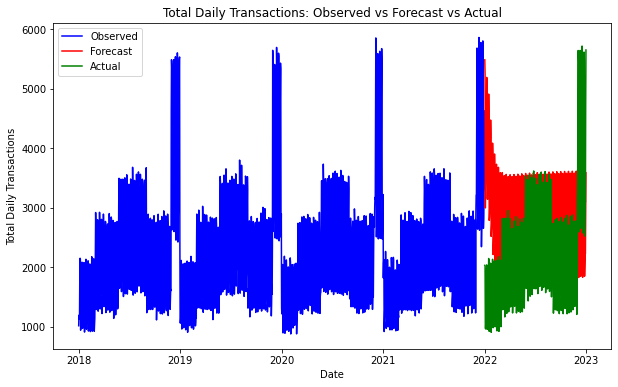

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(train['total_daily_transactions'].index.to_pydatetime(), train['total_daily_transactions'].values, label='Observed', color='blue')

plt.plot(forecast_df['total_daily_transactions'].index.to_pydatetime(), forecast_df['total_daily_transactions'].values, label='Forecast', color='red')

plt.plot(test['total_daily_transactions'].index.to_pydatetime(), test['total_daily_transactions'].values, label='Actual', color='green')

plt.xlabel('Date')
plt.ylabel('Total Daily Transactions')
plt.title('Total Daily Transactions: Observed vs Forecast vs Actual')
plt.legend()
plt.show()

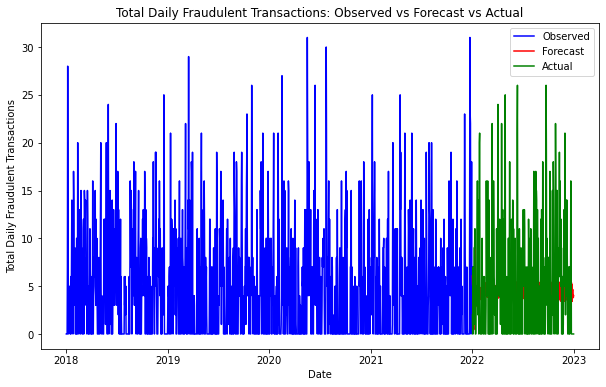

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(train['total_daily_fraud_transactions'].index.to_pydatetime(), train['total_daily_fraud_transactions'].values, label='Observed', color='blue')

plt.plot(forecast_df['total_daily_fraud_transactions'].index.to_pydatetime(), forecast_df['total_daily_fraud_transactions'].values, label='Forecast', color='red')

plt.plot(test['total_daily_fraud_transactions'].index.to_pydatetime(), test['total_daily_fraud_transactions'].values, label='Actual', color='green')

plt.xlabel('Date')
plt.ylabel('Total Daily Fraudulent Transactions')
plt.title('Total Daily Fraudulent Transactions: Observed vs Forecast vs Actual')
plt.legend()
plt.show()

In [65]:
input_value = 143494.76400000002


historical_df = pd.read_csv('average_daily_data.csv')
historical_df['diff'] = (historical_df['total_amount_per_day'] - input_value).abs()

closest_idx = historical_df['diff'].idxmin()

required_observations = 12

missing_observations = required_observations - (closest_idx + 1)

if closest_idx >= 12: 
    forecast_input_df = historical_df.iloc[closest_idx-28:closest_idx+1].copy()
else:
    additional_rows = historical_df.sample(n=missing_observations, replace=True) 
    forecast_input_df = pd.concat([additional_rows, historical_df.iloc[:closest_idx+1]])

forecast_input_df.loc[closest_idx, 'total_amount_per_day'] = input_value


historical_df.drop('diff', axis=1, inplace=True)
forecast_input_df.drop('diff', axis=1, inplace=True)
historical_df.drop('mm_dd', axis=1, inplace=True)
forecast_input_df.drop('mm_dd', axis=1, inplace=True)

forecast_input_values = forecast_input_df.values

forecast = results.forecast(y=forecast_input_values[-results.k_ar:], steps=1)

forecast_df = pd.DataFrame(forecast, columns=historical_df.columns)
total_transactions = forecast_df['total_daily_transactions'].item()
total_fraud = forecast_df['total_daily_fraud_transactions'].item()

print(f"The total transactions for an amount of {input_value} is: {total_transactions}")
print(f"The total fraudulent transactions for an amount of {input_value} is: {total_fraud}")

The total transactions for an amount of 143494.76400000002 is: 1942.8721429119757
The total fraudulent transactions for an amount of 143494.76400000002 is: 6.098337195175572
